# Cgan

In [1]:
from cgan import Decoder,Encoder, Inter, generator, discriminator
from cgan_att import  generator_att
from torch.utils.data import Dataset
from torchvision.io import read_image
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import ImageSet_thomas, ImageSet
import torch
from torchvision.utils import save_image
from torchvision.transforms import GaussianBlur
batch_size = 1
resolution = 512
blur_size = resolution//20
k_size = blur_size + 1 - blur_size%2
blur = GaussianBlur(kernel_size=(k_size,k_size),sigma=blur_size)
### COMPONENTS





In [11]:
ds = ImageSet('img_512/data_dst/aligned/',use_fp16=True)

In [12]:
img, mask = ds. __getitem__(0)

In [13]:
img.shape

torch.Size([3, 512, 512])

In [14]:
mask.shape

torch.Size([1, 256, 256])

In [ ]:
device = "cuda"
#G = generator()
G = generator_att()
G =G.to(device)
#ds = ImageSet_thomas(main_dir="workspace")
ds = ImageSet_thomas(main_dir="img_512")
trainloader = DataLoader(ds,batch_size=batch_size, shuffle=True)


In [11]:
#G.load_state_dict(torch.load("cgan_1950.pth", map_location=device))
G.load_state_dict(torch.load("cgan_att_1400.pth", map_location=device))

<All keys matched successfully>

In [12]:
for i, (imgs, labels, mask) in enumerate(trainloader):
    break

In [13]:
imgs = imgs.to(device)
label = labels.item()
labels = labels.to(device)
mask = blur(mask).to(device)

In [14]:
if label == 0:
    other = torch.tensor([1], device="cuda")
else:
    other = torch.tensor([0], device="cuda")

In [15]:
gen_imgs = G(imgs,labels)
#gen_imgs = imgs * (1-mask ) + gen_imgs * mask
gen_mix = G(imgs,other)
#gen_mix = imgs * (1-mask ) + gen_mix * mask


In [16]:
gen_imgs = gen_imgs.detach().cpu().squeeze().permute(1, 2, 0).numpy()
gen_mix = gen_mix.detach().cpu().squeeze().permute(1, 2, 0).numpy()

In [17]:
imgs = imgs.squeeze().permute(1, 2, 0).detach().cpu().numpy()

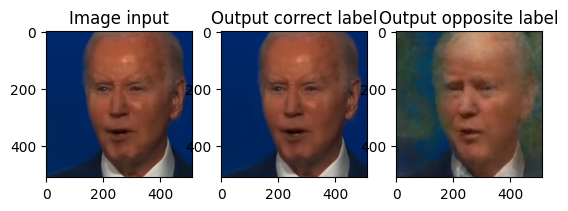

In [18]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(imgs)
plt.title("Image input")
plt.subplot(1,3,2)
plt.imshow(gen_imgs)
plt.title("Output correct label")
plt.subplot(1,3,3)
plt.imshow(gen_mix)
plt.title("Output opposite label")
plt.show()

# Inférence

In [ ]:
G = generator()
G.load_state_dict(torch.load("cgan_1950.pth", map_location=device))
G =G.to(device)

In [21]:
device = "cuda"
batch_size = 4
ds = ImageSet_thomas(main_dir="workspace")
trainloader = DataLoader(ds,batch_size=batch_size, shuffle=False)

1640


In [22]:
labels

tensor([0], device='cuda:0')

In [22]:
other

tensor([0, 0, 0, 0], device='cuda:0', dtype=torch.int32)

In [25]:
count = 0
G.eval()
for i, (imgs, labels, mask) in enumerate(trainloader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    other = (torch.zeros((batch_size), device="cuda") * labels + (1-labels)*torch.ones((batch_size), device="cuda")).int()
    
    imgs_gen = G(imgs,other).detach().cpu()
    imgs = imgs.to("cpu")
    mask = blur(mask)
    imgs_gen = imgs * (1-mask ) + imgs_gen * mask
    if i < (804 // batch_size):
        for k in range(imgs_gen.shape[0]):
            save_image(imgs_gen[k],f"dst_to_src/img_{count}.png")
            count += 1
    else:
        for k in range(imgs_gen.shape[0]):
            save_image(imgs_gen[k],f"src_to_dst/img_{count}.png")
            count += 1
        


# Generate video

In [4]:
from torchvision.io import write_video, read_image
import os
import torch

In [5]:
os.chdir("dst_to_src/")
files = os.listdir()

FileNotFoundError: [Errno 2] No such file or directory: 'dst_to_src/'

In [6]:
img = torch.zeros((len(files),3,256,256))
for i in range(len(files)):
    img[i] = read_image(files[i])

In [7]:
os.chdir("..")
write_video("dst_to_src.mp4",img.permute(0,2,3,1),25)

In [33]:
img.shape

torch.Size([1641, 3, 256, 256])

In [30]:
! pip install av

  Using cached av-11.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.1 MB)
You should consider upgrading via the '/Data/env/bin/python -m pip install --upgrade pip' command.
